In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [17]:
## REAding the data
data= pd.read_excel("C:/Users/spark computer/Desktop/Data Science/jupitor_file/Historical Heart Attack .xlsx ", sheet_name="heart")
## REAding the data
desc= pd.read_excel("C:/Users/spark computer/Desktop/Data Science/jupitor_file/Historical Heart Attack .xlsx ", sheet_name="Data Dict")


In [15]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
desc

,Columns,Descriptions
0,Age,Age of the patient
1,Sex,Sex of the patient
2,exang,exercise induced angina (1 = yes; 0 = no)
3,ca,number of major vessels (0-3)
4,cp,Chest Pain type chest pain type
5,Value 1,typical angina
6,Value 2,atypical angina
7,Value 3,non-anginal pain
8,Value 4,asymptomatic
9,trtbps,resting blood pressure (in mm Hg)


In [19]:
data.info()
## all the columns are numerical driven columns , but most of its categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data cleaning/ Data Wrangling / Data Preprocessing

In [23]:
## Checking duplicate 
duplicate_rows = data[data.duplicated()]
print("number of duplictes rows",duplicate_rows.shape)

number of duplictes rows (1, 14)


In [24]:
## REmoving the duplicate row
data1 = data.drop_duplicates()

In [25]:
data1.shape

(302, 14)

In [26]:
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
## Checking of null values
data1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [28]:
## dectecting the outliers

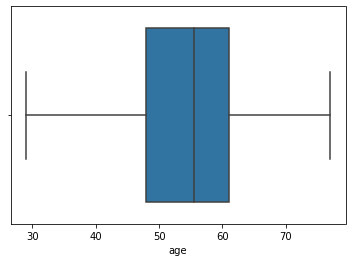

In [29]:
sns.boxplot(data1["age"])  ## Age has no outlier

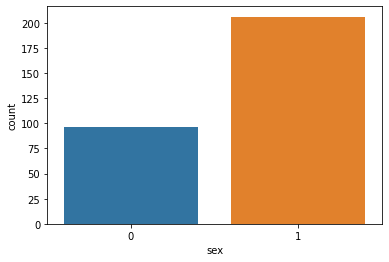

In [31]:
sns.countplot(data1["sex"])  ## sex has no outlier

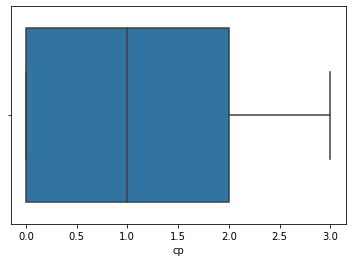

In [32]:
sns.boxplot(data1["cp"])  ## chestpain has no outlier

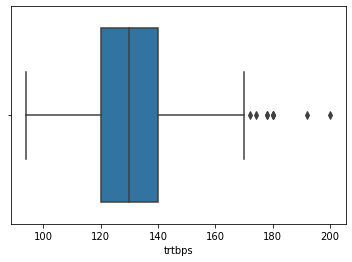

In [33]:
sns.boxplot(data1["trtbps"])  ##  has  outlier to Restinh blood pressure
                            ## we have to imput this outlier data

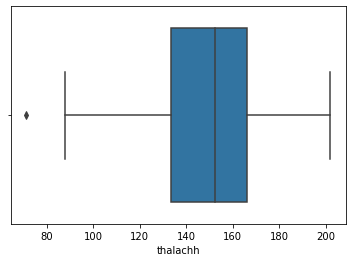

In [34]:
sns.boxplot(data1["thalachh"])  ##  has 1 outlier in lower side

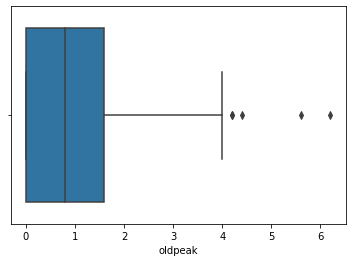

In [35]:
sns.boxplot(data1["oldpeak"])  ##  has  outlier

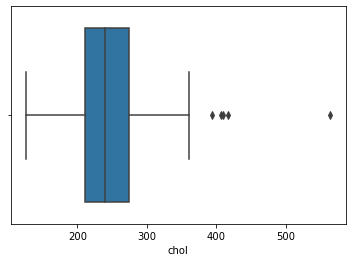

In [36]:
sns.boxplot(data1["chol"])  ## colestrol has  outlier

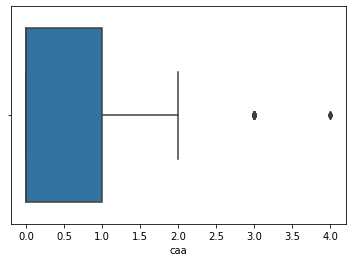

In [37]:
sns.boxplot(data1["caa"])  ##  has  outlier

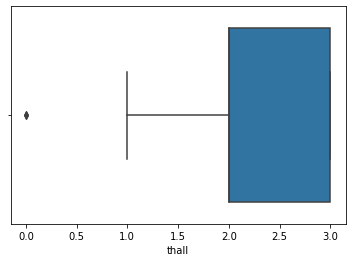

In [38]:
sns.boxplot(data1["thall"])  ## has  outlier

outliers-->> trtbps, chol , thalachh, caa, thall, oldpeak  in parametres 

In [39]:
## REmove outliers


In [41]:
## IQR
Q1= data.quantile(0.25)
Q3= data.quantile(0.75)


In [45]:
IQR = Q3 - Q1
IQR

age         13.5
sex          1.0
cp           2.0
trtbps      20.0
chol        63.5
fbs          0.0
restecg      1.0
thalachh    32.5
exng         1.0
oldpeak      1.6
slp          1.0
caa          1.0
thall        1.0
output       1.0
dtype: float64

In [55]:
## removing outlier using IQR
data2= data1[~((data1<(Q1- 1.5*IQR))| (data1>(Q3 + 1.5*IQR))).any(axis = 1)]

In [56]:
data2.shape

(228, 14)

### Feacture selection

In [62]:

## certain feature which are imp. in predicting heard attack

pearson_Corr = data2.corr()
pearson_Corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.088839,-0.078448,0.266698,0.172527,NaN,-0.082927,-0.413016,0.123981,0.219390,-0.161019,0.391099,0.124380,-0.215120
sex,-0.088839,1.000000,-0.121648,-0.001433,-0.093058,NaN,-0.116956,-0.086734,0.208950,0.178690,-0.009104,0.099091,0.274262,-0.363483
cp,-0.078448,-0.121648,1.000000,0.083476,-0.047258,NaN,0.076362,0.277964,-0.351256,-0.108435,0.101887,-0.196373,-0.153325,0.371115
trtbps,0.266698,-0.001433,0.083476,1.000000,0.126974,NaN,-0.110594,-0.026792,-0.019909,0.131845,-0.026418,0.027864,0.057721,-0.092560
chol,0.172527,-0.093058,-0.047258,0.126974,1.000000,NaN,-0.100622,-0.016899,0.019446,-0.030397,0.066865,0.108537,0.077890,-0.067321
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.082927,-0.116956,0.076362,-0.110594,-0.100622,NaN,1.000000,0.033100,-0.063645,-0.081251,0.094807,-0.082538,0.008018,0.131641
thalachh,-0.413016,-0.086734,0.277964,-0.026792,-0.016899,NaN,0.033100,1.000000,-0.449447,-0.372484,0.418646,-0.272552,-0.216389,0.417870
exng,0.123981,0.208950,-0.351256,-0.019909,0.019446,NaN,-0.063645,-0.449447,1.000000,0.358779,-0.281890,0.197251,0.274480,-0.414407
oldpeak,0.219390,0.178690,-0.108435,0.131845,-0.030397,NaN,-0.081251,-0.372484,0.358779,1.000000,-0.515543,0.332854,0.220089,-0.439194


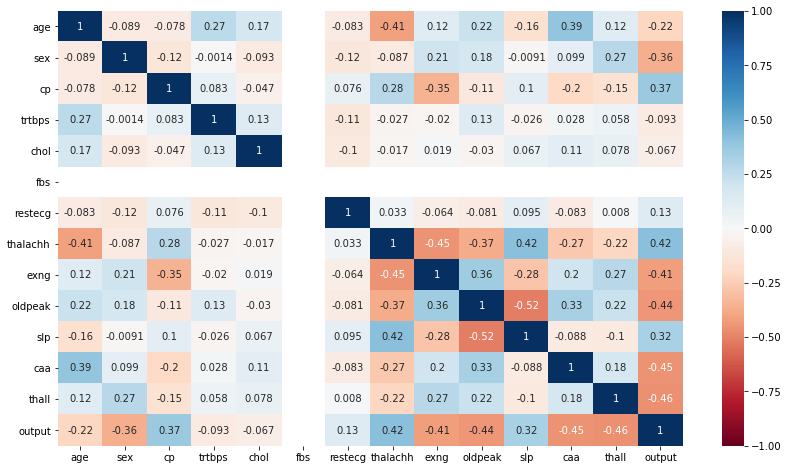

In [65]:
fig = plt.subplots(figsize = (14,8))
sns.heatmap(pearson_Corr,vmax = 1 , vmin = -1, annot = True, cmap="RdBu")

In [67]:
pearson_Corr["output"]

age        -0.215120
sex        -0.363483
cp          0.371115
trtbps     -0.092560
chol       -0.067321
fbs              NaN
restecg     0.131641
thalachh    0.417870
exng       -0.414407
oldpeak    -0.439194
slp         0.323569
caa        -0.447167
thall      -0.455780
output      1.000000
Name: output, dtype: float64

In [68]:
## droping minimum co relation scores parameters
## fbs ,chol,trtbps


In [69]:
del data2["trtbps"]
del data2["fbs"]
del data2["chol"]

In [74]:
data2.shape

(228, 11)

## Model Building

In [140]:
x = data2.drop("output", axis = 1)    ## Indenpendent 
y = data2["output"]                    ## dependantant

In [141]:
y

1      1
2      1
3      1
4      1
5      1
      ..
296    0
298    0
299    0
301    0
302    0
Name: output, Length: 228, dtype: int64

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)


## Decision Tree

In [143]:
Dsc_tree = DecisionTreeClassifier( criterion="entropy") 

In [162]:
%%time
model_train1 = Dsc_tree.fit(x_train,y_train)
print("Training is complete")

Training is complete
Wall time: 0 ns


In [163]:
pred = model_train1.predict(x_test)

In [164]:
pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1], dtype=int64)

In [165]:
confusion_matrix(y_test,pred)


array([[15,  6],
       [ 0, 25]], dtype=int64)

In [166]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        21
           1       0.81      1.00      0.89        25

    accuracy                           0.87        46
   macro avg       0.90      0.86      0.86        46
weighted avg       0.89      0.87      0.87        46



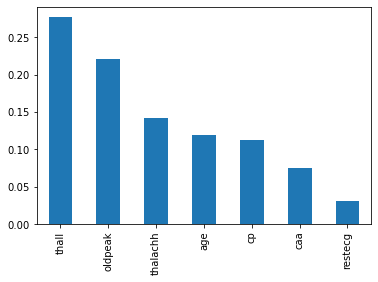

In [167]:
feat_importance = pd.Series(model_train1.feature_importances_,index =x_train.columns)
feat_importance.nlargest(7).plot(kind= "bar")

## Random forest

In [154]:
%%time
RndF= RandomForestClassifier(criterion='entropy')
model_train = RndF.fit(x_train , y_train)
print("training is complete")

training is complete
Wall time: 262 ms


In [155]:
pred1 = model_train.predict(x_test)

In [156]:
pred1

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1], dtype=int64)

In [157]:
confusion_matrix(y_test,pred1)

array([[12,  9],
       [ 3, 22]], dtype=int64)

In [158]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        21
           1       0.71      0.88      0.79        25

    accuracy                           0.74        46
   macro avg       0.75      0.73      0.73        46
weighted avg       0.75      0.74      0.73        46



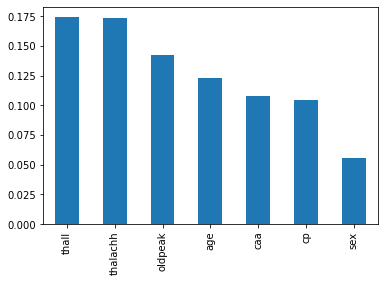

In [159]:
feat_importance = pd.Series(model_train.feature_importances_,index =x_train.columns)
feat_importance.nlargest(7).plot(kind= "bar")

### Decision Tree model gives more accuracy than Random Forest model